In [1]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Descriptive Statistics
## Eksplorasi Data

1. Rata-rata umur pengguna asuransi?

In [4]:
mean_umur = data['age'].mean()
print('Rata-rata umur pengguna asuransi adalah', round(mean_umur,0), 'tahun')

Rata-rata umur pengguna asuransi adalah 39.0 tahun


2. Rata-rata nilai BMI dari pengguna yang merokok?

In [5]:
smoker = np.array(data['bmi'].loc[data['smoker']=='yes']).mean()
print('Rata-rata BMI dari pengguna yang merokok adalah', round(smoker,0))

Rata-rata BMI dari pengguna yang merokok adalah 31.0


3. Apakah variansi dari data charges perokok dan non perokok sama?

In [6]:
data.groupby(['smoker']).agg({'charges':['var']}).round()

,charges
,var
smoker,
no,35925420.0
yes,133207311.0


Variansi data charges perokok dan non perokok **tidak sama**

4. Apakah rata-rata umur perempuan dan laki-laki yang merokok sama?

In [7]:
smoker_yes = data[(data["smoker"]=="yes")]
smoker_yes.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [8]:
smoker_yes.groupby(['smoker', 'sex']).agg({'age':['mean']}).round(0)

age
               mean
smoker sex         
yes    female  39.0
       male    38.0

Diketahui bahwa rata-rata umur dari laki-laki dan perempuan yang merokok **tidak sama**, namun hampir mirip

5. Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok atau non perokok?

In [9]:
data.groupby(['smoker']).agg({'charges':['mean']}).round(2)

,charges
,mean
smoker,
no,8434.27
yes,32050.23


Diketahui rata-rata tagihan perokok **lebih tinggi** daripada non perokok

6. BMI mana yang lebih tinggi, laki-laki atau perempuan?

In [10]:
data.groupby(['sex']).agg({'bmi':['mean']}).round(2)

,bmi
,mean
sex,
female,30.38
male,30.94


Diketahui BMI laki-laki **lebih tinggi**

# Variabel Kategorik (PMF)

1. Gender mana yang memiliki tagihan paling tinggi?

In [11]:
data.groupby(['sex']).agg({'charges':['mean']}).round(2)

,charges
,mean
sex,
female,12569.58
male,13956.75


Diketahui gender male/laki-laki memiliki **tagihan paling tinggi**

2. Distribusi Peluang Tagihan di setiap region?

In [12]:
peluang_tagihan = data.groupby(['region']).agg({'charges':['mean']}).round()
peluang_tagihan

,charges
,mean
region,
northeast,13406.0
northwest,12418.0
southeast,14735.0
southwest,12347.0


In [13]:
total = peluang_tagihan['charges','mean'].sum()
distribusi_northeast = round(((peluang_tagihan['charges','mean'][0])/total)*100.0)
distribusi_northwest = round(((peluang_tagihan['charges','mean'][1])/total)*100.0)
distribusi_southeast = round(((peluang_tagihan['charges','mean'][2])/total)*100.0)
distribusi_southwest = round(((peluang_tagihan['charges','mean'][3])/total)*100.0)

print('distribusi peluang northeast =',distribusi_northeast,'%')
print('distribusi peluang nortwest =',distribusi_northwest,'%')
print('distribusi peluang southeast =',distribusi_southeast,'%')
print('distribusi peluang southwest =',distribusi_southwest,'%')

distribusi peluang northeast = 25 %
distribusi peluang nortwest = 23 %
distribusi peluang southeast = 28 %
distribusi peluang southwest = 23 %


3. Apakah setiap region memiliki proporsi data banyak orang yang sama? akan dijabarkan dibawah ini

In [14]:
proporsi_region = data.groupby(['region']).agg({'charges':['count']}).reset_index()
proporsi_region

,region,charges
,,count
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


In [15]:
total = proporsi_region['charges','count'].sum()
proporsi_northeast = round(((proporsi_region['charges','count'][0])/total)*100.0)
proporsi_northwest = round(((proporsi_region['charges','count'][1])/total)*100.0)
proporsi_southeast = round(((proporsi_region['charges','count'][2])/total)*100.0)
proporsi_southwest = round(((proporsi_region['charges','count'][3])/total)*100.0)

print('proporsi data northeast =',proporsi_northeast,'%')
print('proporsi data nortwest =',proporsi_northwest,'%')
print('proporsi data southeast =',proporsi_southeast,'%')
print('proporsi data southwest =',proporsi_southwest,'%')
print('jawabannya adalah tidak')

proporsi data northeast = 24 %
proporsi data nortwest = 24 %
proporsi data southeast = 27 %
proporsi data southwest = 24 %
jawabannya adalah tidak


4. Mana yang lebih tinggi, proporsi perokok atau non perokok?

In [16]:
proporsi_perokok = data.groupby(['smoker']).agg({'charges':['count']}).reset_index()
proporsi_perokok

,smoker,charges
,,count
0,no,1064
1,yes,274


In [17]:
total = proporsi_perokok['charges','count'].sum()
proporsi_non_perokok = round(((proporsi_perokok['charges','count'][0])/total)*100.0)
proporsi_perokok = round(((proporsi_perokok['charges','count'][1])/total)*100.0)

print('proporsi non_perokok =',proporsi_non_perokok,'%')
print('proporsi perokok =',proporsi_perokok,'%')
print('proporsi non_perokok lebih besar daripada perokok')

proporsi non_perokok = 80 %
proporsi perokok = 20 %
proporsi non_perokok lebih besar daripada perokok


untuk soal no 5. dan no 6. menggunakan data dibawah ini

In [18]:
data_smoker = data.groupby(['sex','smoker']).agg({'charges':['count']}).reset_index()
data_smoker

,sex,smoker,charges
,,,count
0,female,no,547
1,female,yes,115
2,male,no,517
3,male,yes,159


5. Berapa peluang seseorang tersebut adalah perempuan jika dia perokok?

In [19]:
total_female = data_smoker['charges','count'][:2].sum()
female_smoker = data_smoker['charges','count'][1]
peluang = round(((female_smoker/total_female)*100),2)

print('Peluang perempuan dan perokok',peluang,'%')

Peluang perempuan dan perokok 17.37 %


6. Berapa peluang seseorang tersebut adalah laki-laki jika dia perokok?

In [20]:
total_male = data_smoker['charges','count'][2:4].sum()
male_smoker = data_smoker['charges','count'][3]
peluang = round(((male_smoker/total_male)*100),2)

print('Peluang laki-laki dan perokok',peluang,'%')

Peluang laki-laki dan perokok 23.52 %


# Variabel Kontinu (CDF)

1. Mencari Peluang Tagihan berdasarkan BMI

In [21]:
# membuat kondisi BMI
conditions = [
    (data['bmi'] <= 25),
    (data['bmi'] > 25)
    ]
# membuat value
values = ['BMI <= 25', 'BMI > 25']

# memasukan ke data insurance
data['bmi_category'] = np.select(conditions, values)

data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,BMI > 25
1,18,male,33.770,1,no,southeast,1725.55230,BMI > 25
2,28,male,33.000,3,no,southeast,4449.46200,BMI > 25
3,33,male,22.705,0,no,northwest,21984.47061,BMI <= 25
4,32,male,28.880,0,no,northwest,3866.85520,BMI > 25


In [22]:
bmi_category = data.groupby(['bmi_category']).agg({'charges':['count']})
bmi_category

,charges
,count
bmi_category,
BMI <= 25,247
BMI > 25,1091


In [23]:
bmi_total = bmi_category['charges','count'].sum()
bmi_total

1338

In [24]:
bmi_category['distribusi_peluang (%)'] = round((((bmi_category['charges',
                                                               'count']/bmi_total)*100)),2)
bmi_category

,charges,distribusi_peluang (%)
,count,
bmi_category,,
BMI <= 25,247,18.46
BMI > 25,1091,81.54


Dengan peluang **81,54%** didapatkan tagihan dari BMI diatas 25

2. Peluang seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan diatas 16700 **(P(charges > 16700 | bmi > 25 and smoker))**

In [25]:
condition_1 = data[(data["smoker"]=="yes") & (data["bmi"]>25) & (data["charges"]>16700)]
cond_1 = condition_1.index.value_counts().sum()
cond_1

215

In [26]:
total_upper_16700 = data[(data["charges"]>16700)]
total_up_16700 = total_upper_16700.index.value_counts().sum()
total_up_16700

334

In [27]:
peluang = ((cond_1/total_up_16700)*100)

print('Peluang seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan diatas 16700 adalah', round(peluang,2),'%')

Peluang seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan diatas 16700 adalah 64.37 %


3. Peluang acak Perokok dengan tagihan kesehatan diatas 16700? **(P(charges > 16700 | charges > 16700 and smoker))**

In [28]:
condition_2 = data[(data["smoker"]=="yes") & (data["charges"]>16700)]
cond_2 = condition_2.index.value_counts().sum()
cond_2

254

In [29]:
total_upper_16700 = data[(data["charges"]>16700)]
total_up_16700 = total_upper_16700.index.value_counts().sum()
total_up_16700

334

In [30]:
peluang = ((cond_2/total_up_16700)*100)

print('Peluang seorang perokok dengan tagihan kesehatan diatas 16700 adalah', round(peluang,2),'%')

Peluang seorang perokok dengan tagihan kesehatan diatas 16700 adalah 76.05 %


4. Mana yang lebih tinggi peluangnya?
    1. bmi diatas 25 tagihan diatas 16700, atau
    2. bmi dibawah 25 tagihan diatas 16700

In [31]:
condition_A = data[(data["bmi"]>25) & (data["charges"]>16700)]
cond_A = condition_A.index.value_counts().sum()
cond_A

283

In [32]:
condition_B = data[(data["bmi"]<25) & (data["charges"]>16700)]
cond_B = condition_B.index.value_counts().sum()
cond_B

51

In [33]:
total_upper_16700 = data[(data["charges"]>16700)]
total_up_16700 = total_upper_16700.index.value_counts().sum()
total_up_16700

334

In [34]:
cond_A = ((cond_A/total_up_16700)*100)
cond_B = ((cond_B/total_up_16700)*100)

if cond_A > cond_B:
    print('Peluang BMI diatas 25 dengan tagihan diatas 16700 lebih tinggi dengan peluang,'
          , round(cond_A, 2), '%')
else:
    print('Peluang BMI dibawah 25 dengan tagihan diatas 16700 lebih tinggi dengan peluang,'
          , round(cond_B, 2), '%')

Peluang BMI diatas 25 dengan tagihan diatas 16700 lebih tinggi dengan peluang, 84.73 %


5. Mana yang lebih tinggi peluangnya?
    1. Perokok BMI diatas 25 tagihan diatas 16700, atau
    2. Perokok BMI dibawah 25 tagihan diatas 16700

In [35]:
condition_A = data[(data["smoker"]=="yes") & (data["bmi"]>25) & (data["charges"]>16700)]
cond_A = condition_A.index.value_counts().sum()
cond_A

215

In [36]:
condition_B = data[(data["smoker"]=="yes") & (data["bmi"]<25) & (data["charges"]>16700)]
cond_B = condition_B.index.value_counts().sum()
cond_B

39

In [37]:
total_upper_16700 = data[(data["charges"]>16700)]
total_up_16700 = total_upper_16700.index.value_counts().sum()
total_up_16700

334

In [38]:
cond_A = ((cond_A/total_up_16700)*100)
cond_B = ((cond_B/total_up_16700)*100)

if cond_A>cond_B:
    print('Peluang Perokok, BMI diatas 25, tagihan diatas 16700 lebih tinggi dengan peluang,'
          , round(cond_A,2), '%')
else:
    print('Peluang Perokok, BMI dibawah 25, tagihan diatas 16700 lebih tinggi dengan peluang,'
          , round(cond_B,2), '%')

Peluang Perokok, BMI diatas 25, tagihan diatas 16700 lebih tinggi dengan peluang, 64.37 %


## Analisa Korelasi

In [39]:
import pandas as pd
import numpy as np
from numpy import cov
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

import ipywidgets as widgets
from ipywidgets import interact

In [40]:
# read data
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


1. Hubungan antara bmi dengan charges?

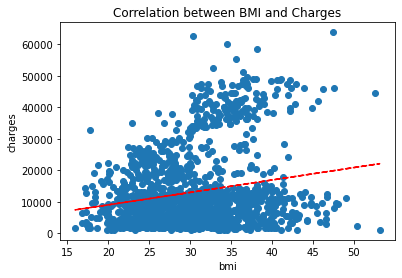

In [41]:
import matplotlib.pyplot as plt
# Prepare the Data
x = data["bmi"]
y = data["charges"]

# Calculate the Trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot
plt.figure(figsize = (6, 4))
plt.scatter(x, y)
plt.plot(x, p(x), color="Red", linestyle="--")
plt.title("Correlation between BMI and Charges")
plt.xlabel('bmi')
plt.ylabel('charges');

In [42]:
np.cov(data['bmi'], data['charges'])

array([[3.71878836e+01, 1.46473044e+04],
       [1.46473044e+04, 1.46652372e+08]])

In [43]:
data[['bmi', 'charges']].corr().round(2)

,bmi,charges
bmi,1.0,0.2
charges,0.2,1.0


Disimpulkan bahwa hubungan antara bmi dengan charges **berkorelasi positif namun lemah**

2. bagaimana age dengan charges?

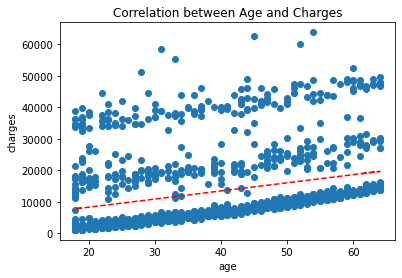

In [44]:
import matplotlib.pyplot as plt
# Prepare the Data
x = data['age']
y = data['charges']

# Calculate the Trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot
plt.figure(figsize = (6, 4))
plt.scatter(x, y)
plt.plot(x, p(x), color="Red", linestyle="--")
plt.title("Correlation between Age and Charges")
plt.xlabel('age')
plt.ylabel('charges');

In [45]:
np.cov(data['age'], data['charges'])

array([[1.97401387e+02, 5.08748023e+04],
       [5.08748023e+04, 1.46652372e+08]])

In [46]:
data[['age', 'charges']].corr().round(2)

,age,charges
age,1.0,0.3
charges,0.3,1.0


Disimpulkan bahwa hubungan antara age dengan charges **berkorelasi positif namun lemah**

3. Bagaimana children dengan charges?

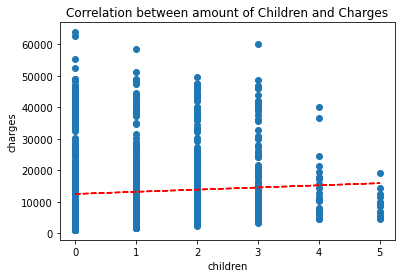

In [47]:
import matplotlib.pyplot as plt
# Prepare the Data
x = data['children']
y = data['charges']

# Calculate the Trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot
plt.figure(figsize = (6, 4))
plt.scatter(x, y)
plt.plot(x, p(x), color="Red", linestyle="--")
plt.title("Correlation between amount of Children and Charges")
plt.xlabel('children')
plt.ylabel('charges');

In [48]:
np.cov(data['children'], data['charges'])

array([[1.45321275e+00, 9.92674197e+02],
       [9.92674197e+02, 1.46652372e+08]])

In [49]:
data[['children', 'charges']].corr().round(2)

,children,charges
children,1.00,0.07
charges,0.07,1.00


Disimpulkan bahwa hubungan antara children dengan charges **tidak berkorelasi** karena mendekati 0

## Hypothesis Testing

1. Tagihan kesehatan perokok lebih tinggi dari tagihan kesehatan non perokok?

Langkah 1 - lakukan sampling data

In [50]:
perokok = np.array(data['charges'].loc[data['smoker']=='yes'].sample(n=30))
perokok

array([21098.55405, 27218.43725, 36397.576  , 19107.7796 , 17081.08   ,
       32734.1863 , 17748.5062 , 44423.803  , 27808.7251 , 24393.6224 ,
       48675.5177 , 42856.838  , 29141.3603 , 22412.6485 , 19594.80965,
       26926.5144 , 38746.3551 , 34672.1472 , 37079.372  , 39597.4072 ,
       36197.699  , 21677.28345, 46599.1084 , 17560.37975, 12829.4551 ,
       46151.1245 , 34617.84065, 18259.216  , 24869.8368 , 16577.7795 ])

In [51]:
non_perokok = np.array(data['charges'].loc[data['smoker']=='no'].sample(n=30))
non_perokok

array([ 5012.471  ,  6272.4772 ,  1621.3402 , 11830.6072 , 12146.971  ,
        5400.9805 ,  7348.142  ,  5966.8874 ,  9549.5651 ,  9583.8933 ,
        3987.926  ,  6858.4796 ,  9193.8385 ,  3201.24515,  1515.3449 ,
       28923.13692,  2055.3249 , 27117.99378,  3579.8287 ,  7152.6714 ,
        5312.16985, 12622.1795 , 12124.9924 ,  2710.82855, 21344.8467 ,
       30063.58055,  1632.03625,  3353.284  ,  4827.90495, 11881.358  ])

dikarenakan kita mengambil sample berjumlah 30 dan mengasumsikan tidak mengetahui standar deviasinya maka yang digunakan adalah **statistik uji t-test 2 sampel**

Hipothesis yang kita uji adalah:
$$H_0: \mu(perokok) \geq \mu(non perokok)$$
$$H_1: \mu(perokok) <  \mu(non perokok)$$

Langkah 2 - inisiasi alpha

In [52]:
alpha = 0.05

Langkah 3 - aturan keputusan

* Alpha = 0.05
* Uji Pihak Kiri (karena $H_1$ mengandung tanda <)

Langkah 4 - melakukan uji statistik t

In [53]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a=perokok, b=non_perokok, equal_var=False, alternative='less')

print('Statistics = %.2f, p-value = %.2f' % (stat,p))

Statistics = 8.44, p-value = 1.00


Langkah 5 - pengambilan keputusan

In [54]:
if p > alpha:
    print('Gagal tolak H0')
else:
    print('tolak H0')

Gagal tolak H0


Langkah 6 - kesimpulan

Karena hasil dari keputusan adalah **Gagal tolak H0** maka **Rata-rata tagihan perokok memang lebih tinggi daripada non-perokok**

2. Tagihan kesehatan dengan bmi diatas 25 lebih tinggi daripada tagihan kesehatan bmi dibawah 25?

Langkah 1 - lakukan sampling data

In [55]:
charges_bmi_upper25 = np.array(data['charges'].loc[data['bmi']>25].sample(n=30))
charges_bmi_upper25

array([ 4058.1161 , 36307.7983 , 17081.08   ,  1632.56445,  6414.178  ,
        2494.022  , 46130.5265 ,  2850.68375,  4667.60765, 10325.206  ,
        3366.6697 , 14692.66935,  3591.48   ,  2203.47185, 14254.6082 ,
        2710.82855, 10493.9458 ,  2523.1695 ,  5428.7277 ,  1639.5631 ,
       13770.0979 ,  9563.029  , 36580.28216,  7626.993  ,  1137.011  ,
        6282.235  , 11085.5868 , 17560.37975, 14319.031  ,  7445.918  ])

In [56]:
charges_bmi_under25 = np.array(data['charges'].loc[data['bmi']<25].sample(n=30))
charges_bmi_under25

array([16420.49455,  1832.094  ,  4931.647  , 13204.28565,  7222.78625,
        6593.5083 , 13725.47184, 35069.37452, 13012.20865,  3353.4703 ,
       19798.05455, 13747.87235,  1121.8739 , 21195.818  ,  4005.4225 ,
       27117.99378, 13129.60345, 11830.6072 ,  2585.85065, 22192.43711,
        6858.4796 ,  4185.0979 ,  9182.17   , 18767.7377 ,  2709.1119 ,
       11729.6795 , 24873.3849 ,  2974.126  , 23887.6627 ,  4032.2407 ])

dikarenakan kita mengambil sample berjumlah 30 dan mengasumsikan tidak mengetahui standar deviasinya maka yang digunakan adalah **statistik uji t-test 2 sampel**

Hipothesis yang kita uji adalah:
$$H_0: \mu(bmi>25) \geq \mu(bmi<25)$$
$$H_1: \mu(bmi>25) <  \mu(bmi<25)$$

Langkah 2 - inisiasi alpha

In [57]:
alpha = 0.05

Langkah 3 - aturan keputusan

* Alpha = 0.05
* Uji Pihak Kiri (karena $H_1$ mengandung tanda <)

Langkah 4 - uji statistik t

In [58]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a=charges_bmi_upper25, b=charges_bmi_under25, equal_var=False, alternative='less')

print('Statistics = %.2f, p-value = %.2f' % (stat,p))

Statistics = -0.55, p-value = 0.29


Langkah 5 - pengambilan keputusan

In [59]:
if p > alpha:
    print('Gagal tolak H0')
else:
    print('tolak H0')

Gagal tolak H0


Langkah 6 - kesimpulan

Karena hasil dari keputusan adalah **Gagal tolak H0** maka **Rata-rata tagihan bmi diatas 25 memang lebih tinggi daripada bmi dibawah 25**

3. BMI laki-laki dan perempuan sama?

Langkah 1 - lakukan sampling data

In [60]:
male = np.array(data['bmi'].loc[data['sex']=='male'].sample(n=30))
male

array([27.835, 24.51 , 30.8  , 30.875, 25.1  , 23.76 , 32.7  , 27.36 ,
       37.51 , 21.5  , 26.03 , 32.3  , 21.85 , 31.445, 36.6  , 28.5  ,
       25.175, 27.6  , 33.82 , 28.31 , 29.83 , 27.74 , 29.83 , 41.8  ,
       30.8  , 27.36 , 26.41 , 45.43 , 34.96 , 42.9  ])

In [61]:
female = np.array(data['bmi'].loc[data['sex']=='female'].sample(n=30))
female

array([22.895, 25.3  , 35.53 , 35.15 , 29.8  , 36.85 , 26.8  , 34.105,
       30.685, 25.365, 16.815, 22.61 , 37.43 , 35.3  , 27.6  , 36.   ,
       21.755, 29.07 , 24.035, 31.92 , 26.29 , 39.2  , 26.885, 22.135,
       34.32 , 37.145, 30.14 , 29.92 , 28.785, 33.25 ])

dikarenakan kita mengambil sample berjumlah 30 dan mengasumsikan tidak mengetahui standar deviasinya maka yang digunakan adalah **statistik uji t-test 2 sampel**

Hipothesis yang kita uji adalah:
$$H_0: \mu(male) = \mu(female)$$
$$H_1: \mu(male) \not=  \mu(female)$$

Langkah 2 - inisiasi alpha

In [62]:
alpha = 0.05

Langkah 3 - aturan keputusan

* Alpha = 0.05
* Uji Pihak Kanan (karena $H_1$ mengandung tanda $\not =$)

Langkah 4 - uji statistik t

In [63]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a=male, b=female, equal_var=False, alternative='greater')

print('Statistics = %.2f, p-value = %.2f' % (stat,p))

Statistics = 0.39, p-value = 0.35


Langkah 5 - pengambilan keputusan

In [64]:
if p > alpha:
    print('Gagal tolak H0')
else:
    print('tolak H0')

Gagal tolak H0


Langkah 6 - kesimpulan

Karena hasil dari keputusan adalah **Gagal tolak H0** maka **Rata-rata BMI laki-laki maupun perempuan cenderung sama**